In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

path = r"C:\Users\yongr\PycharmProjects\pythonProject1\housing.csv"

df = pd.read_csv(path)

print(df)

        RM  LSTAT  PTRATIO      MEDV
0    6.575   4.98     15.3  504000.0
1    6.421   9.14     17.8  453600.0
2    7.185   4.03     17.8  728700.0
3    6.998   2.94     18.7  701400.0
4    7.147   5.33     18.7  760200.0
..     ...    ...      ...       ...
484  6.593   9.67     21.0  470400.0
485  6.120   9.08     21.0  432600.0
486  6.976   5.64     21.0  501900.0
487  6.794   6.48     21.0  462000.0
488  6.030   7.88     21.0  249900.0

[489 rows x 4 columns]


In [25]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [26]:
df.shape

(489, 4)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [28]:
#remove duplicates
df = df.drop_duplicates()
df = df.dropna()

In [29]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [30]:
df.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

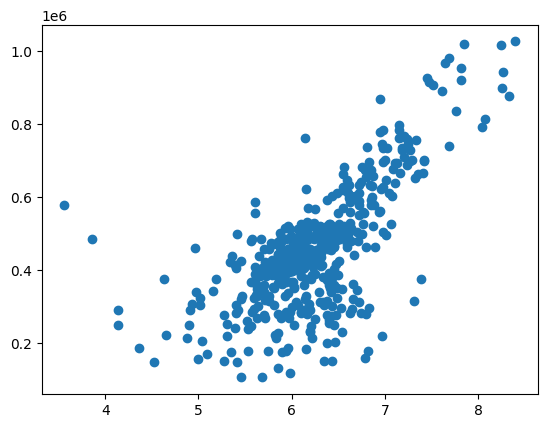

In [31]:
from sklearn.model_selection import train_test_split
plt.scatter(df['RM'],df['MEDV'])


In [32]:
# Define features and target variable
X = df.drop('MEDV', axis=1)  # Features
target = df["MEDV"]

'''
@:param random_state
The random_state is a seed for the random number generator,
it ensures that I will get the same output everytime I run this code
@:param test_size
test_size=0.2 means that I have the 80 percent of the data acting as training set
and 20 percent as testing set.
'''
X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.2,random_state=101)

In [33]:
linearR = LinearRegression()

In [34]:
'''
The fit method is used for training data from the training dataset
@:parameter X_train
X_train is the x set of values that are being split from the set of feature values from X
@:parameter y_train contains the corresponding test values from y
'''
linearR.fit(X_train, y_train)

LinearRegression()

In [35]:
predic = linearR.predict(X_test)

In [36]:
from sklearn import metrics

print('R-squared:', metrics.r2_score(y_test, predic))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predic))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predic))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predic)))

R-squared: 0.7252223767076543
Mean Absolute Error: 69250.34632740814
Mean Squared Error: 8589286526.085741
Root Mean Squared Error: 92678.40377394154
